<a href="https://www.kaggle.com/code/samithsachidanandan/sentiment-analysis-with-imdb-tf?scriptVersionId=279035447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import Libraries

In [1]:
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-me

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

2025-11-17 08:23:41.236575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763367821.591218      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763367821.686552      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
max_len = 200
n_words = 10000
dim_embedding = 128 
EPOCHS = 30  
BATCH_SIZE = 64 

### Loading the Data

In [4]:
def load_data():
    # Load data.
    (X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)
    # Pad sequences with max_len.
    X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
    X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
    return (X_train, y_train), (X_test, y_test)

### Model 

In [5]:
def build_model():
    model = models.Sequential([
        layers.Embedding(n_words, 128, input_length=max_len),
        layers.SpatialDropout1D(0.3),  
        
        layers.Bidirectional(layers.LSTM(64, return_sequences=True,
                                        recurrent_dropout=0.2)),  
        layers.Dropout(0.4),  
        
        layers.Bidirectional(layers.LSTM(32, recurrent_dropout=0.2)),
        layers.Dropout(0.4),
        
        layers.Dense(64, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.02)), 
        layers.Dropout(0.5), 
        
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [6]:
def plot_training_history(history):
 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

In [7]:
(X_train, y_train), (X_test, y_test) = load_data()
model = build_model()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-11-17 08:24:09.721110: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [9]:
# Setup callbacks
callbacks = [

    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=0.00001,
        verbose=1
    )
]


In [10]:

# Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,  
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 164s 469ms/step - accuracy: 0.5965 - loss: 1.2221 - val_accuracy: 0.7032 - val_loss: 0.6072 - learning_rate: 0.0010
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 460ms/step - accuracy: 0.7626 - loss: 0.5446 - val_accuracy: 0.8076 - val_loss: 0.4466 - learning_rate: 0.0010
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 148s 474ms/step - accuracy: 0.8427 - loss: 0.4070 - val_accuracy: 0.8370 - val_loss: 0.3889 - learning_rate: 0.0010
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 148s 473ms/step - accuracy: 0.8820 - loss: 0.3218 - val_accuracy: 0.8674 - val_loss: 0.3381 - learning_rate: 0.0010
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 468ms/step - accuracy: 0.9230 - loss: 0.2352 - val_accuracy: 0.8628 - val_loss: 0.3558 - learning_rate: 0.0010
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 151s 483ms/step - accuracy: 0.9341 - loss: 0.1994 - val_accuracy: 0.8758 - val_loss: 0.3375 - learning_rate: 0.0010
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 455ms/step - accura

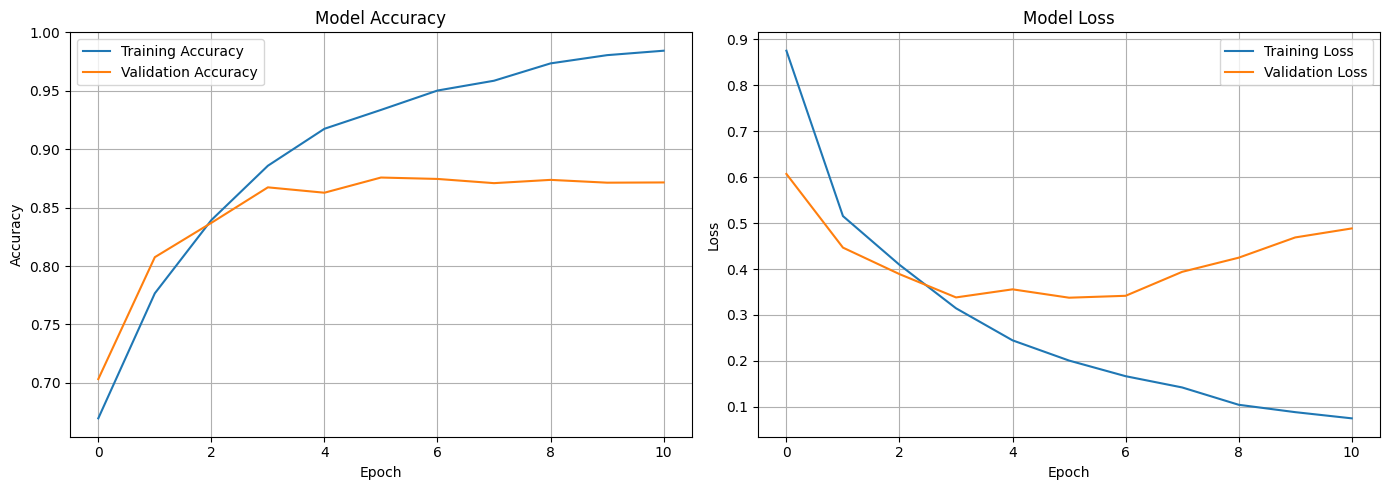

In [11]:
# Visualize training
plot_training_history(history)

In [12]:
# Build model and show summary
model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,272,773 (16.30 MB)

 Trainable params: 1,424,257 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,848,516 (10.87 MB)

In [13]:
# Evaluate on test set
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.8618 - loss: 0.3676
Test Loss: 0.3597
Test Accuracy: 0.8650


In [14]:
# Save the model
model.save('sentiment_model.keras')